In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)


In [37]:
df = pd.read_pickle('endowment.pkl')
df = df[df.Founded!="Error"]
df.head()

college  sat_reading_75  sat_math_75  sat_writing_75  \
0            auburn university           620.0        650.0           620.0   
2           samford university           630.0        610.0           610.0   
3  university of south alabama           550.0        565.0           520.0   
4          spring hill college           600.0        600.0           610.0   
7        john brown university           640.0        640.0           610.0   

   admission_rate  admission_yield  tuition                 control  \
0            83.0             29.0   9852.0                  Public   
2            77.0             29.0  26328.0  Private not-for-profit   
3            86.0             45.0   6948.0                  Public   
4            46.0             14.0  30924.0  Private not-for-profit   
7            70.0             38.0  22734.0  Private not-for-profit   

   undergrad_enrollment  grad_enrollment  graduation_rate  financialaid_rate  \
0               19799.0           5065.0             63.0               76.0   
2                3013.0           1820.0             64.0               98.0   
3               11307.0           3758.0             27.0               91.0   
4                1292.0            130.0             55.0              100.0   
7                2080.0            516.0             65.0               99.0   

   endowment          Endowment_wikipedia Founded  \
0    22092.0     $738.7 million (2017)[1]    1856   
2    60561.0  $297 million (Fall 2018)[1]    1841   
3    11350.0              $497 million[1]    1963   
4    15871.0          US $19.1 million[1]    1830   
7    38304.0            $113.3 million[1]    1919   

                          name       par_mean     par_median        k_mean  \
0            auburn university  219521.834635  131058.333333  43746.811523   
2           samford university  256059.695312  140791.666667  41736.846354   
3  university of south alabama   92002.733724   73808.333333  31507.006510   
4          spring hill college  170054.690104  103425.000000  38653.481283   
7        john brown university  127542.771701   89544.444444  31278.960286   

       k_median  
0  37308.333333  
2  34158.333333  
3  27725.000000  
4  34291.666667  
7  28444.444444

In [51]:
# quick regex to clean up founded year data
df['Founded2'] = df.Founded.str.replace(r'(.*)([0-9]{4})(.*)',r'\2',regex=True).astype(int)
df['age'] = df.Founded2.subtract(2019).multiply(-1)

df['sat_75'] = df.sat_reading_75 + df.sat_math_75 + df.sat_writing_75
df['sat_math'] = df.sat_math_75 / df.sat_75
df['sat_reading'] = df.sat_reading_75 / df.sat_75

df['enrollment'] = df.undergrad_enrollment + df.grad_enrollment
df['grad_pct'] = df.grad_enrollment / df.enrollment

df['public'] = pd.get_dummies(df.control)["Public"]

In [5]:
df.drop(['Founded','Founded2','Endowment_wikipedia','undergrad_enrollment','grad_enrollment','sat_reading_75','sat_math_75','sat_writing_75','k_median','par_median'],axis=1,inplace=True)
df.head()

college  admission_rate  admission_yield  tuition  \
0            auburn university            83.0             29.0   9852.0   
2           samford university            77.0             29.0  26328.0   
3  university of south alabama            86.0             45.0   6948.0   
4          spring hill college            46.0             14.0  30924.0   
7        john brown university            70.0             38.0  22734.0   

                  control  graduation_rate  financialaid_rate  endowment  \
0                  Public             63.0               76.0    22092.0   
2  Private not-for-profit             64.0               98.0    60561.0   
3                  Public             27.0               91.0    11350.0   
4  Private not-for-profit             55.0              100.0    15871.0   
7  Private not-for-profit             65.0               99.0    38304.0   

                          name       par_mean        k_mean  age  sat_75  \
0            auburn university  219521.834635  43746.811523  163  1890.0   
2           samford university  256059.695312  41736.846354  178  1850.0   
3  university of south alabama   92002.733724  31507.006510   56  1635.0   
4          spring hill college  170054.690104  38653.481283  189  1810.0   
7        john brown university  127542.771701  31278.960286  100  1890.0   

   sat_math  sat_reading  enrollment  grad_pct  public  
0  0.343915     0.328042     24864.0  0.203708       1  
2  0.329730     0.340541      4833.0  0.376578       0  
3  0.345566     0.336391     15065.0  0.249452       1  
4  0.331492     0.331492      1422.0  0.091421       0  
7  0.338624     0.338624      2596.0  0.198767       0

In [47]:
# transform potential Y - variables
df['log_endowment'] = np.log(df['endowment'])
df['sqrt_endowment'] = np.sqrt(df['endowment'])
df['log_k_mean'] = np.log(df['k_mean'])
df['sqrt_k_mean'] = np.sqrt(df['k_mean'])


In [7]:
df.to_pickle('endowment2.pkl')

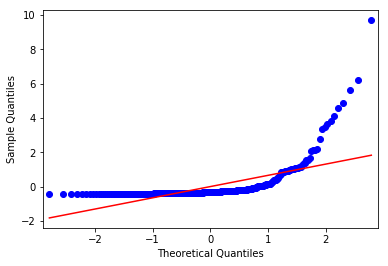

In [8]:
sm.qqplot(df.endowment, fit=True, line='r');


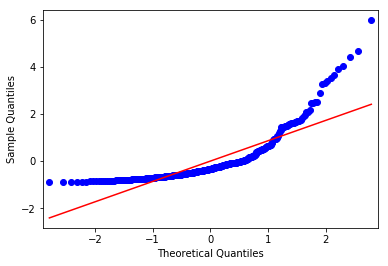

In [9]:
sm.qqplot(df.sqrt_endowment, fit=True, line='r');

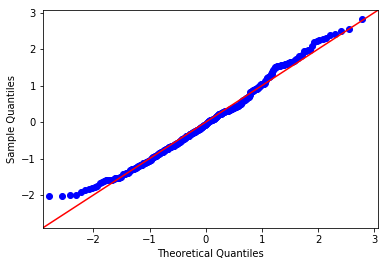

In [10]:
sm.qqplot(df.log_endowment, fit=True, line='45');

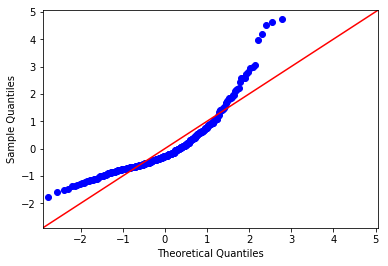

In [11]:
sm.qqplot(df.k_mean, fit=True, line='45');

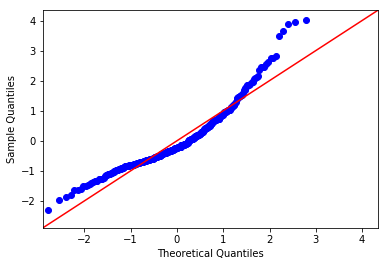

In [12]:
sm.qqplot(df.sqrt_k_mean, fit=True, line='45');

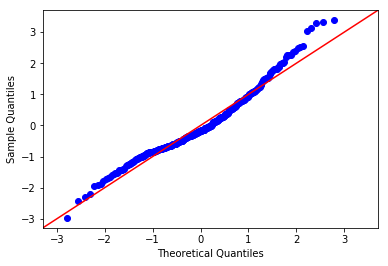

In [13]:
sm.qqplot(df.log_k_mean, fit=True, line='45');

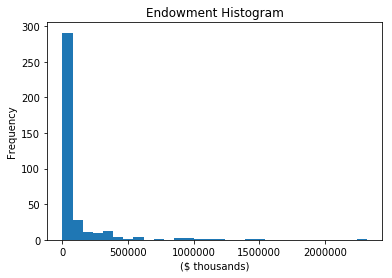

In [14]:
endhist =plt.hist(df.endowment,30);
plt.title('Endowment Histogram')
plt.xlabel("($ thousands)")
plt.ylabel("Frequency")
plt.savefig("endhist.png", format='png', dpi=1000 ,bbox_inches='tight')

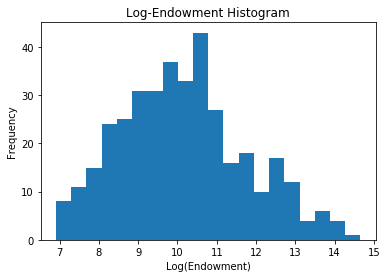

In [15]:
plt.hist(df.log_endowment,20);
plt.title('Log-Endowment Histogram')
plt.xlabel("Log(Endowment)")
plt.ylabel("Frequency")
plt.savefig("logendhist.png", format='png', dpi=1000 ,bbox_inches='tight')

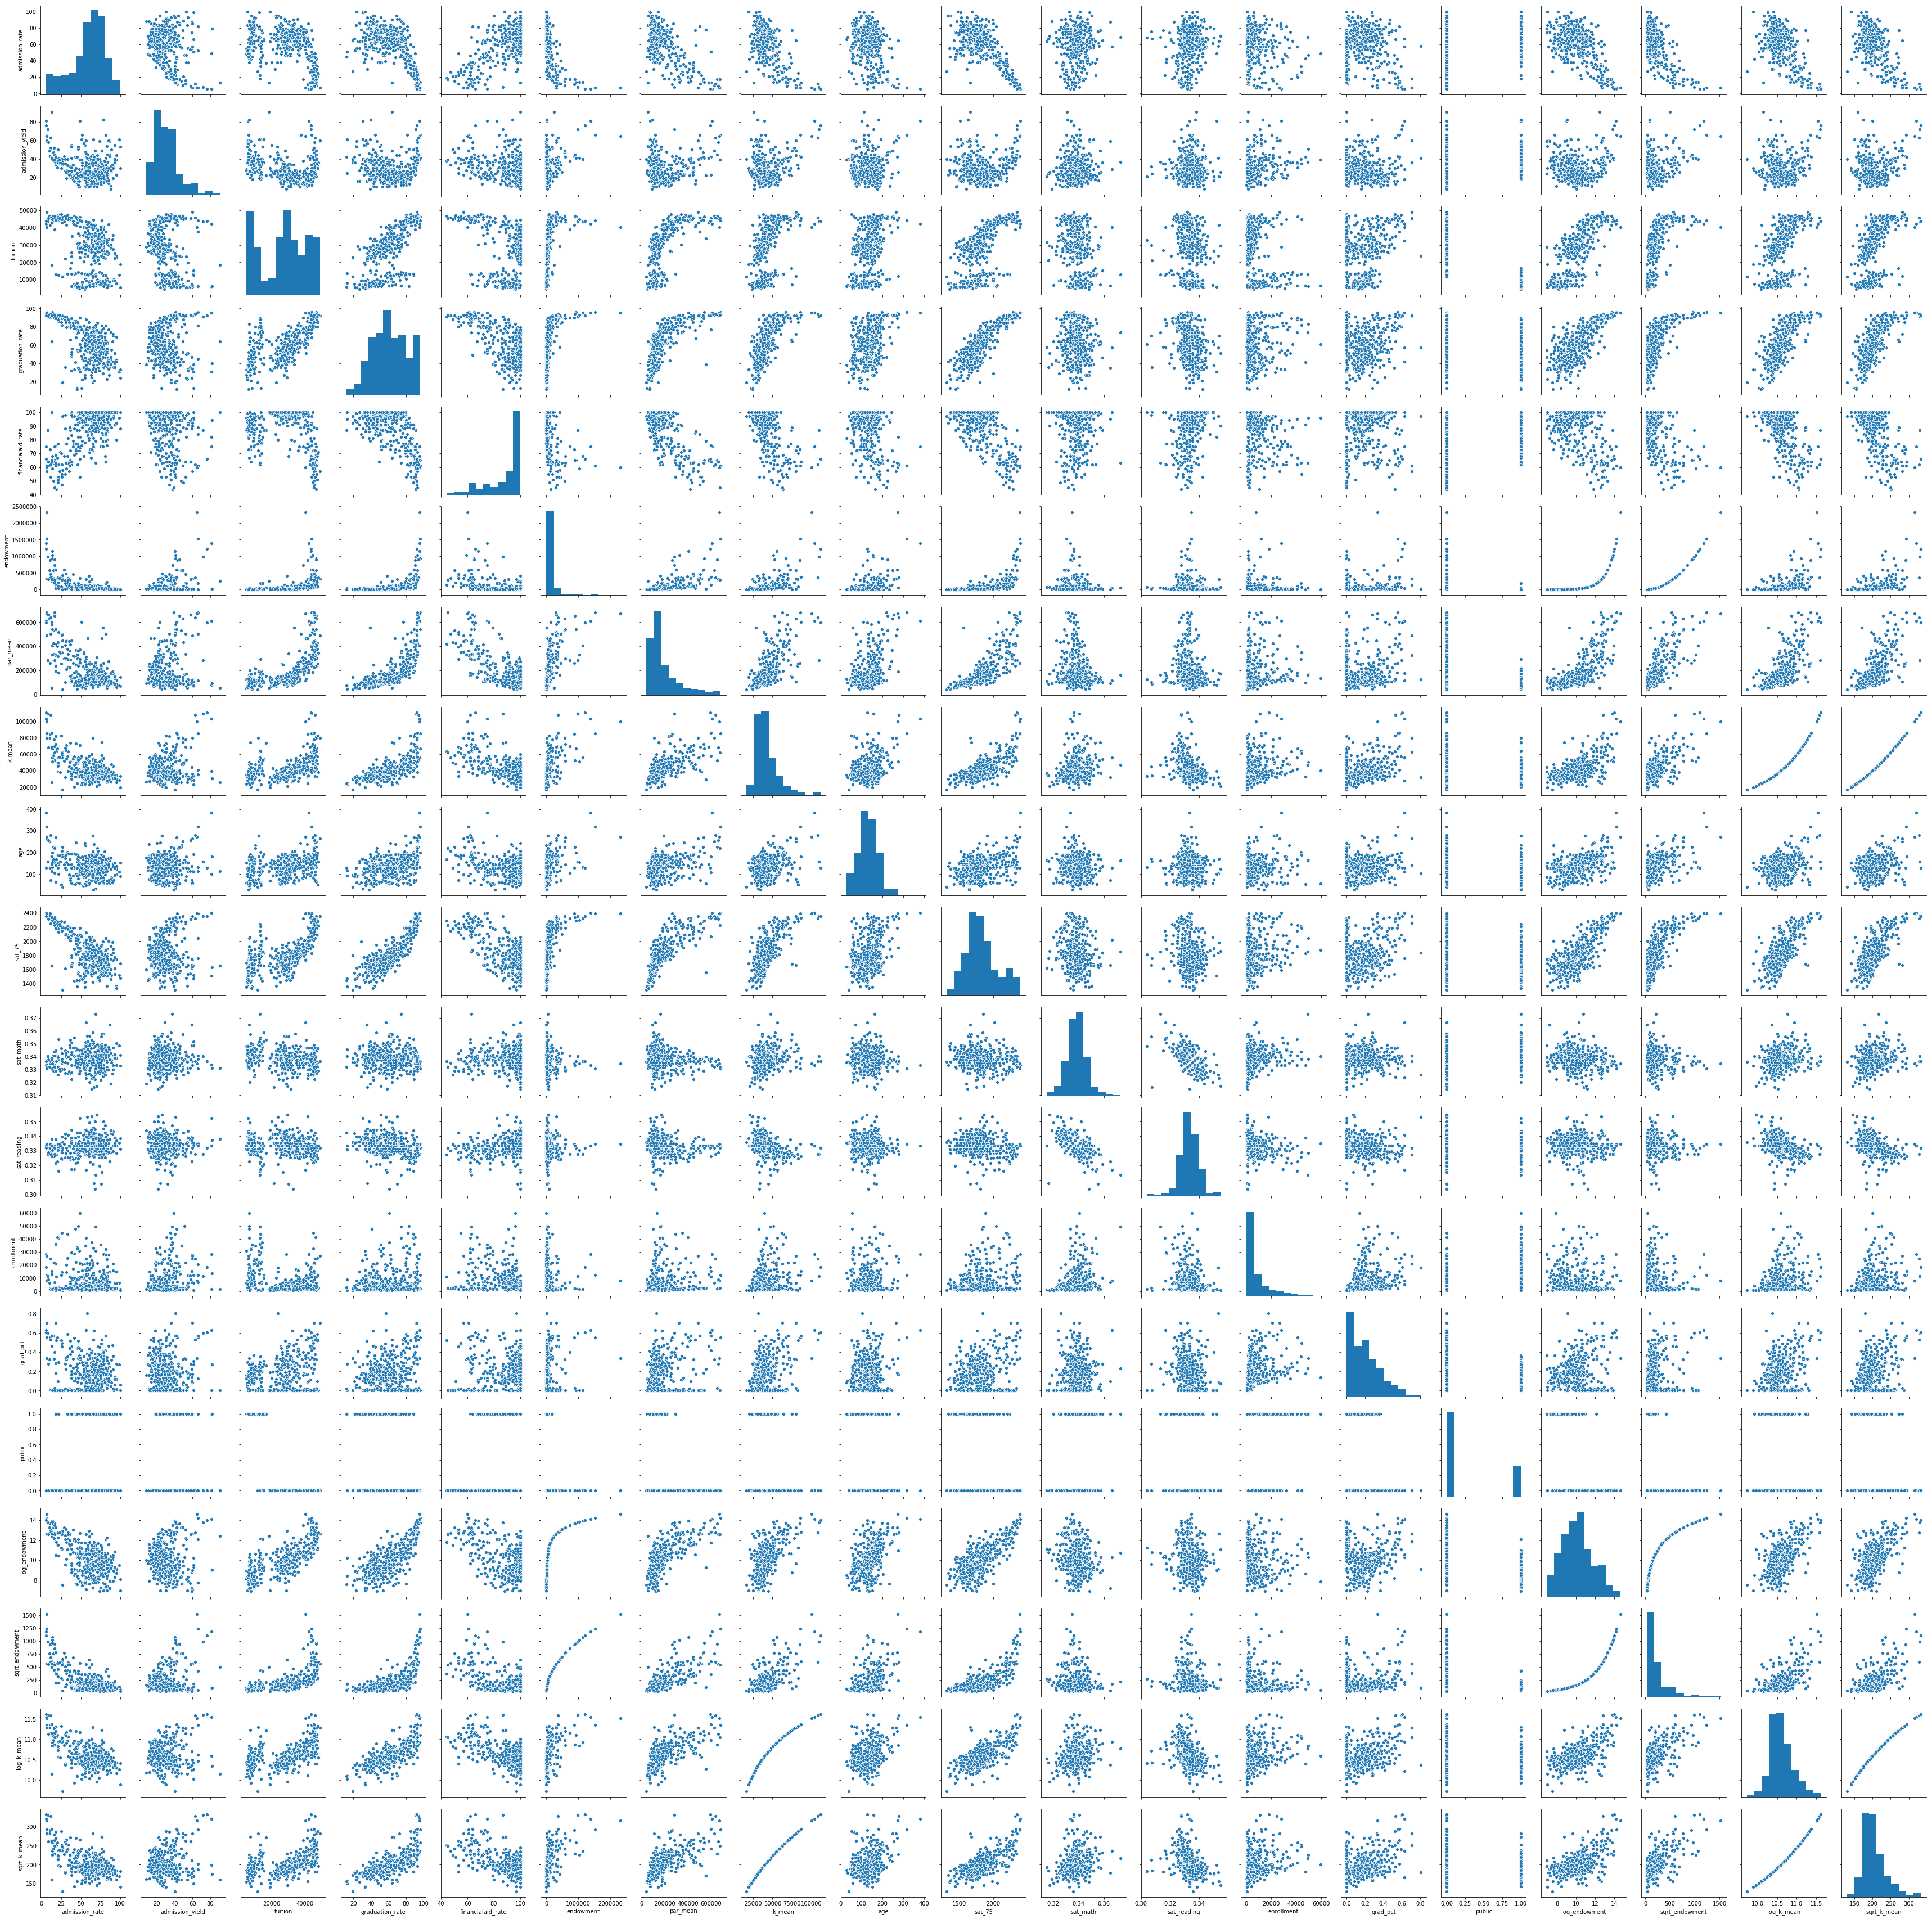

In [16]:
sns.pairplot(df);

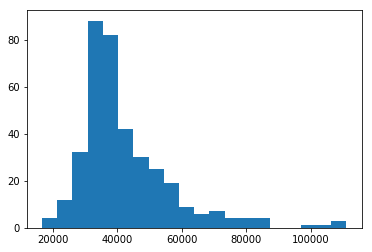

In [17]:
plt.hist(df.k_mean,20);

In [18]:

vars = [   
    'log_endowment',
    'admission_rate',
    'admission_yield',
    'tuition',
    'public',
    'enrollment',
    'grad_pct',
    'graduation_rate',
    'financialaid_rate',
    'par_mean',
    'k_mean',
    'age',
    'sat_75',
    'sat_math',
    'sat_reading']
smalldf = df.loc[:,vars]

In [19]:
corr = smalldf.corr()

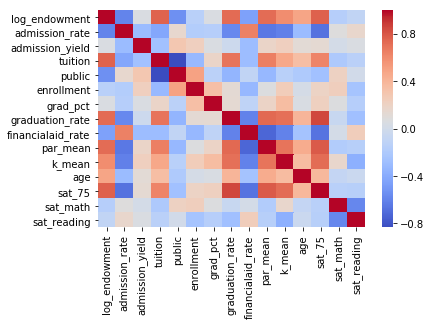

In [20]:
# plot the heatmap
cormap = sns.heatmap(corr,
        cmap = 'coolwarm',
        xticklabels=corr.columns,
        yticklabels=corr.columns,);

In [21]:
figure=cormap.get_figure()
figure.savefig("cormap.png", format='png', dpi=1000 ,bbox_inches='tight')

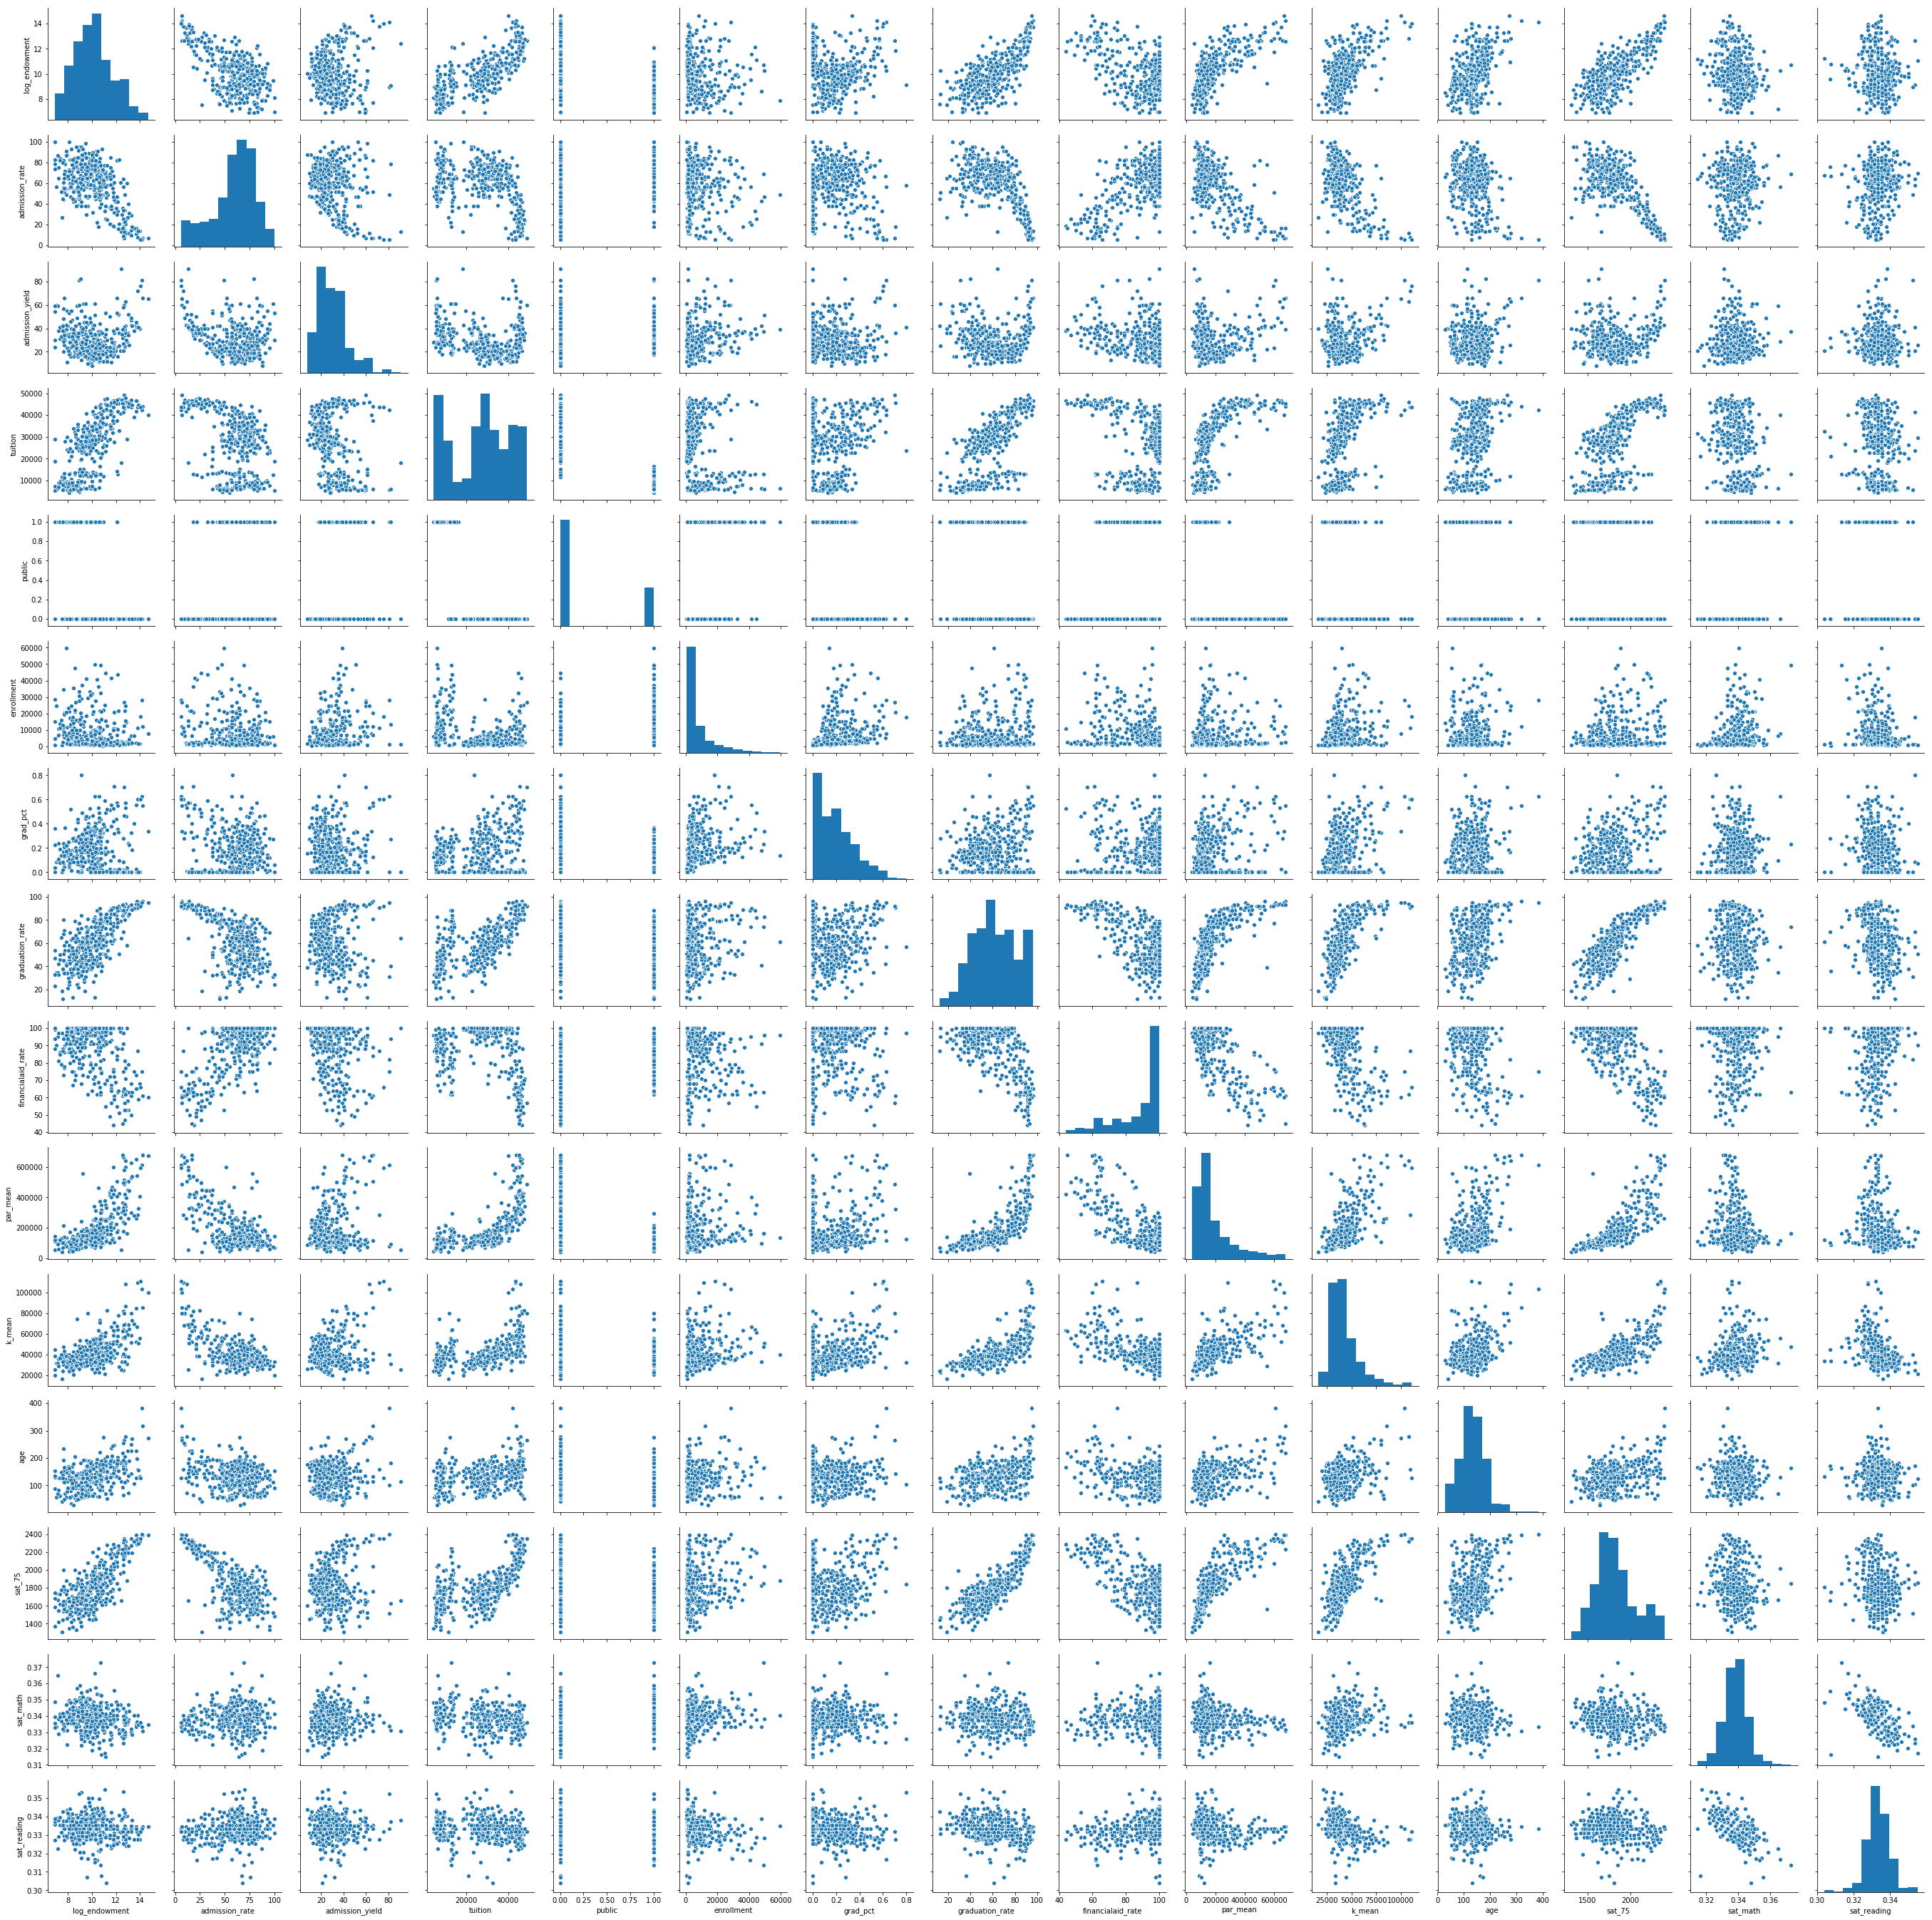

In [22]:
sns.pairplot(smalldf);

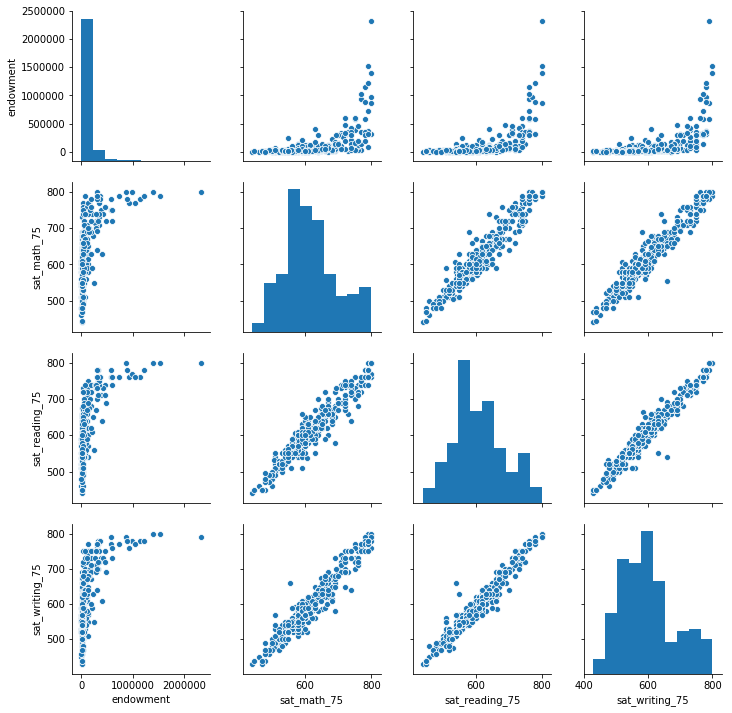

In [57]:
vars2 = [   
    'endowment',
    'sat_math_75',
    'sat_reading_75',
    'sat_writing_75']

smalldf2 = df.loc[:,vars2]
satpair = sns.pairplot(smalldf2)
satpair.savefig("satpair.png", format='png', dpi=1000 ,bbox_inches='tight')

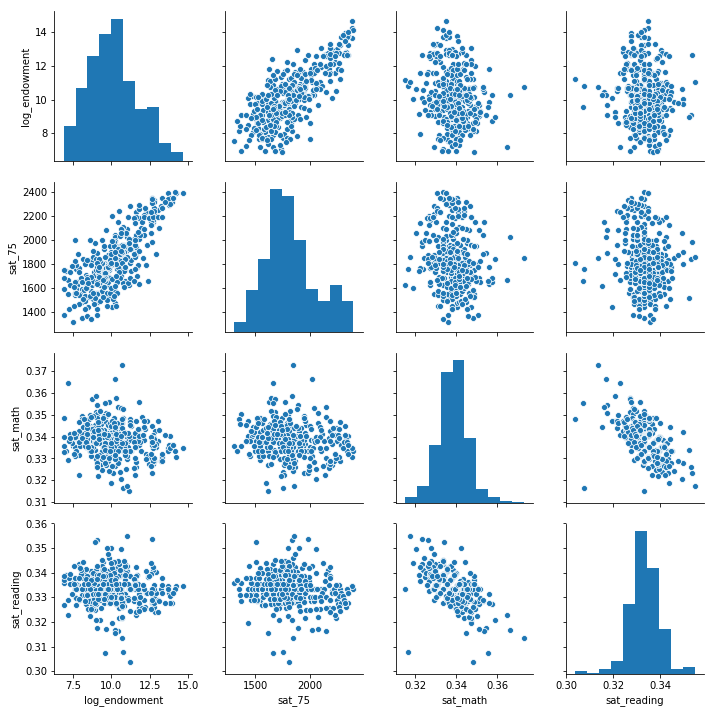

In [58]:
vars2_l = [   
    'log_endowment',
    'sat_75',
    'sat_math',
    'sat_reading']

smalldf2_l = df.loc[:,vars2_l]
satpair_l = sns.pairplot(smalldf2_l)
satpair_l.savefig("satpair_l.png", format='png', dpi=1000 ,bbox_inches='tight')

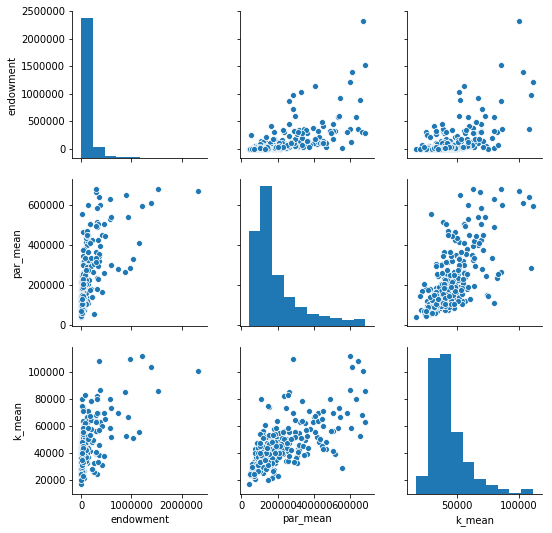

In [59]:

vars4 = [   
    'endowment',
    'par_mean',
    'k_mean',
    ]

smalldf4 = df.loc[:,vars4]
enrollpair = sns.pairplot(smalldf4)
enrollpair.savefig("enrollpair.png", format='png', dpi=1000 ,bbox_inches='tight')

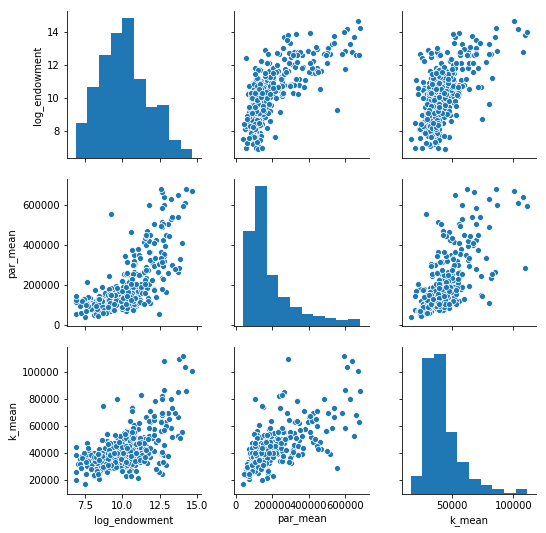

In [60]:

vars4_l = [   
    'log_endowment',
    'par_mean',
    'k_mean',
    ]

smalldf4_l = df.loc[:,vars4_l]
enrollpair_l = sns.pairplot(smalldf4_l)
enrollpair_l.savefig("enrollpair_l.png", format='png', dpi=1000 ,bbox_inches='tight')

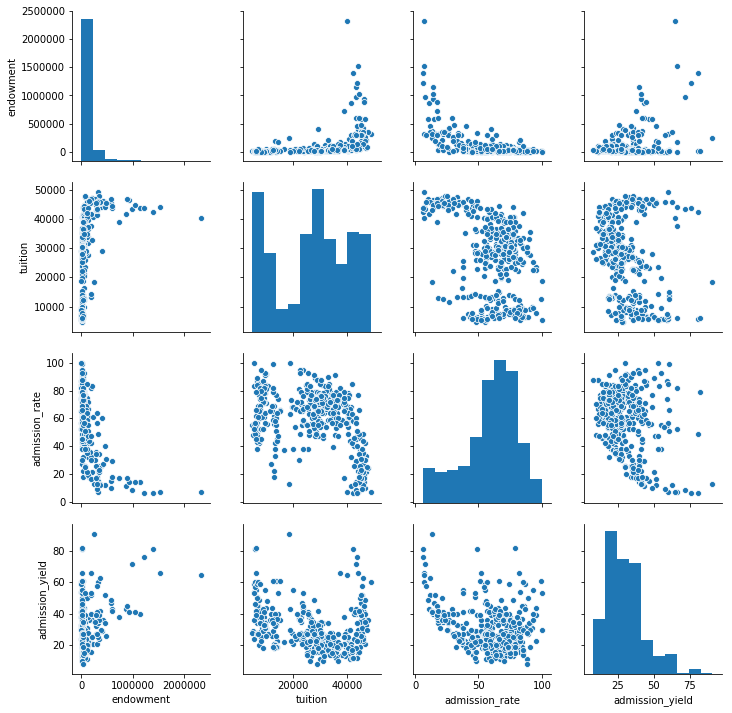

In [55]:
vars5 = [   
    'endowment',
    'tuition',
    'admission_rate',
    'admission_yield'
    ]

smalldf5 = df.loc[:,vars5]
enrollpair = sns.pairplot(smalldf5)

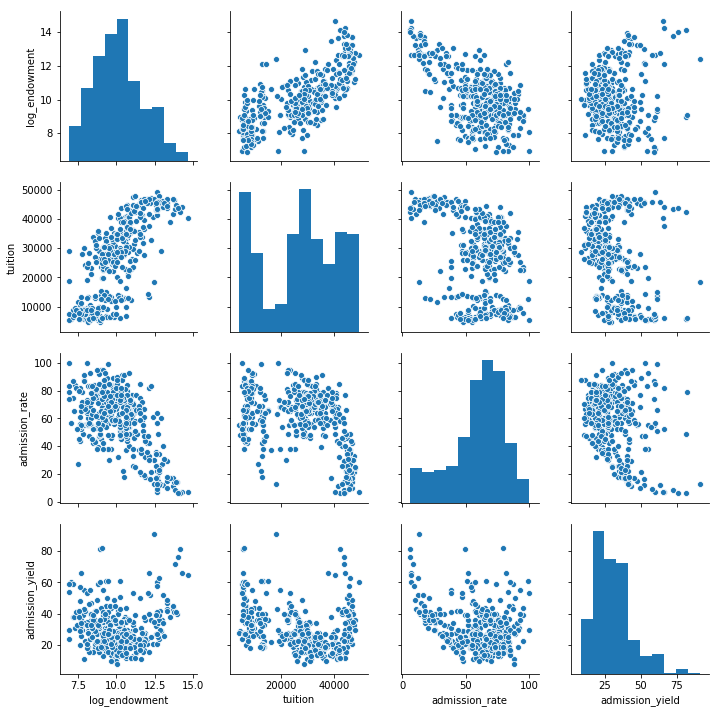

In [56]:
vars5_l = [   
    'log_endowment',
    'tuition',
    'admission_rate',
    'admission_yield'
    ]

smalldf5_l = df.loc[:,vars5_l]
enrollpair_l = sns.pairplot(smalldf5_l)